<a href="https://colab.research.google.com/github/RobCaamano/MLP-FRED/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP Code
## Explanation

This code predicts the Retail Sales in the United States using data from the Federal Reserve Economic Data (FRED). The data is stored in a CSV file that is downloaded directly from the provided URL. The prediction is done using a neural network.

The code splits the data into a training and testing set - 80% and 20% of the total data respectively. It then converts the training and testing data into the needed time series format. It then defines a neural network model with one hidden layer containing 50 neurons and a ReLU activation function. The model is compiled using the mean squared error loss function and the Adam optimizer with a learning rate of 0.001.

The model is fit using the training data for 500 epochs with a batch size of 32, a validation split of 10%, and no shuffling of the data. The model then predicts the retail sales for the test data for the next month.

Lastly two plots are generated:
1. Shows the complete history, real data and predicted values
2. Shows the actual data and predicted values

Import Libraries

In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Displays plots inline
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

Data

In [ ]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# Automatically download file from site - allows run without user intervention
import requests

# Download from FRED direct csv download
url = "https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=RSXFSN&scale=left&cosd=1992-01-01&coed=2023-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-05-06&revision_date=2023-05-06&nd=1992-01-01"
file_name = "RSXFSN.csv"

# Get file from URL
response = requests.get(url)
response.raise_for_status()

# Save content as CSV
with open(file_name, "wb") as f:
    f.write(response.content)

print(f"File '{file_name}' has been downloaded and saved.")


File 'RSXFSN.csv' has been downloaded and saved.


In [ ]:
# Store data into DataFrame
df = pd.read_csv("RSXFSN.csv")

In [ ]:
# keep real GDP column only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale data
df = df/10000

Data Preprocessing

In [ ]:
# split train & test data - 80% training, 20% testing
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
print(len(train), len(test))

300 75


In [ ]:
# Convert data into time series format
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [ ]:
# Set num steps & features for input data
n_steps = 16
n_features = 1

# convert to a time series dimension: [samples, n_steps, n_features]

x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


Modeling

In [ ]:
# define model
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

Training

In [ ]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 0s 12ms/step - loss: 0.5435 - val_loss: 0.4663
Epoch 2/500
8/8 [==============================] - 0s 6ms/step - loss: 0.5439 - val_loss: 0.4679
...
Epoch 499/500
8/8 [==============================] - 0s 8ms/step - loss: 0.4105 - val_loss: 0.4339
Epoch 500/500
8/8 [==============================] - 0s 7ms/step - loss: 0.4104 - val_loss: 0.4328


Evaluation

In [ ]:
# Predict the test data
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


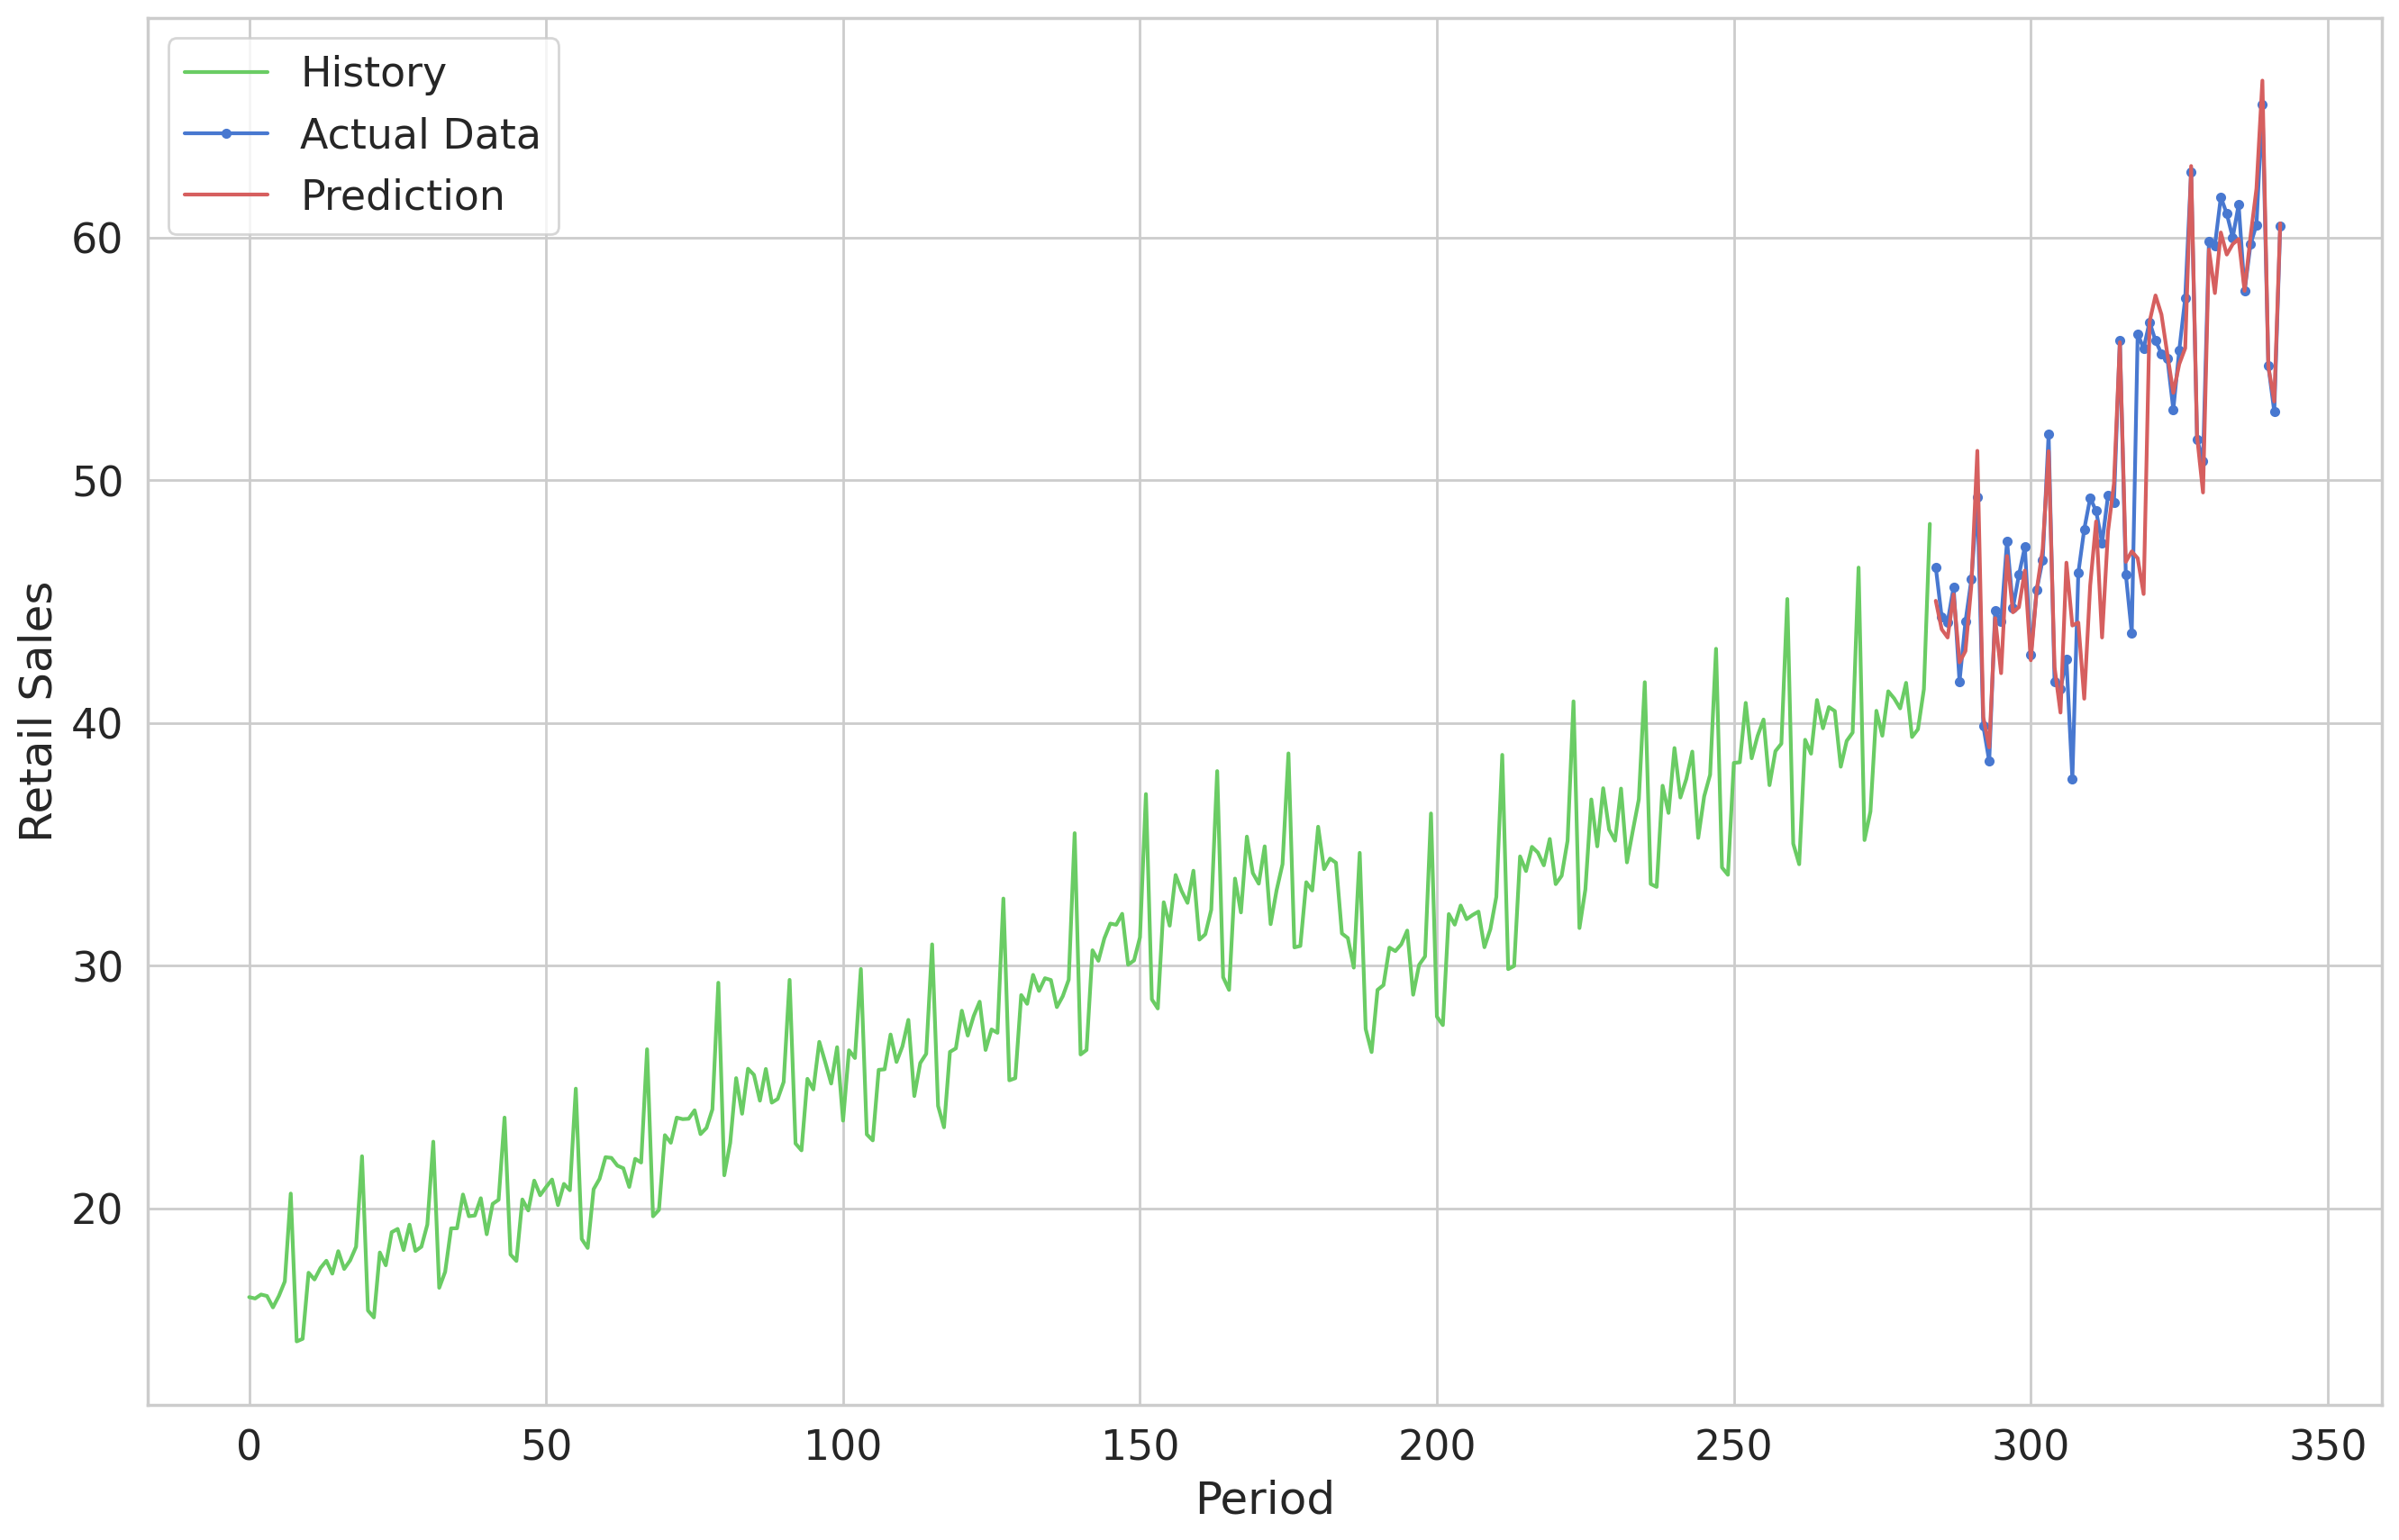

In [ ]:
# Plot history, real data & predicted values
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

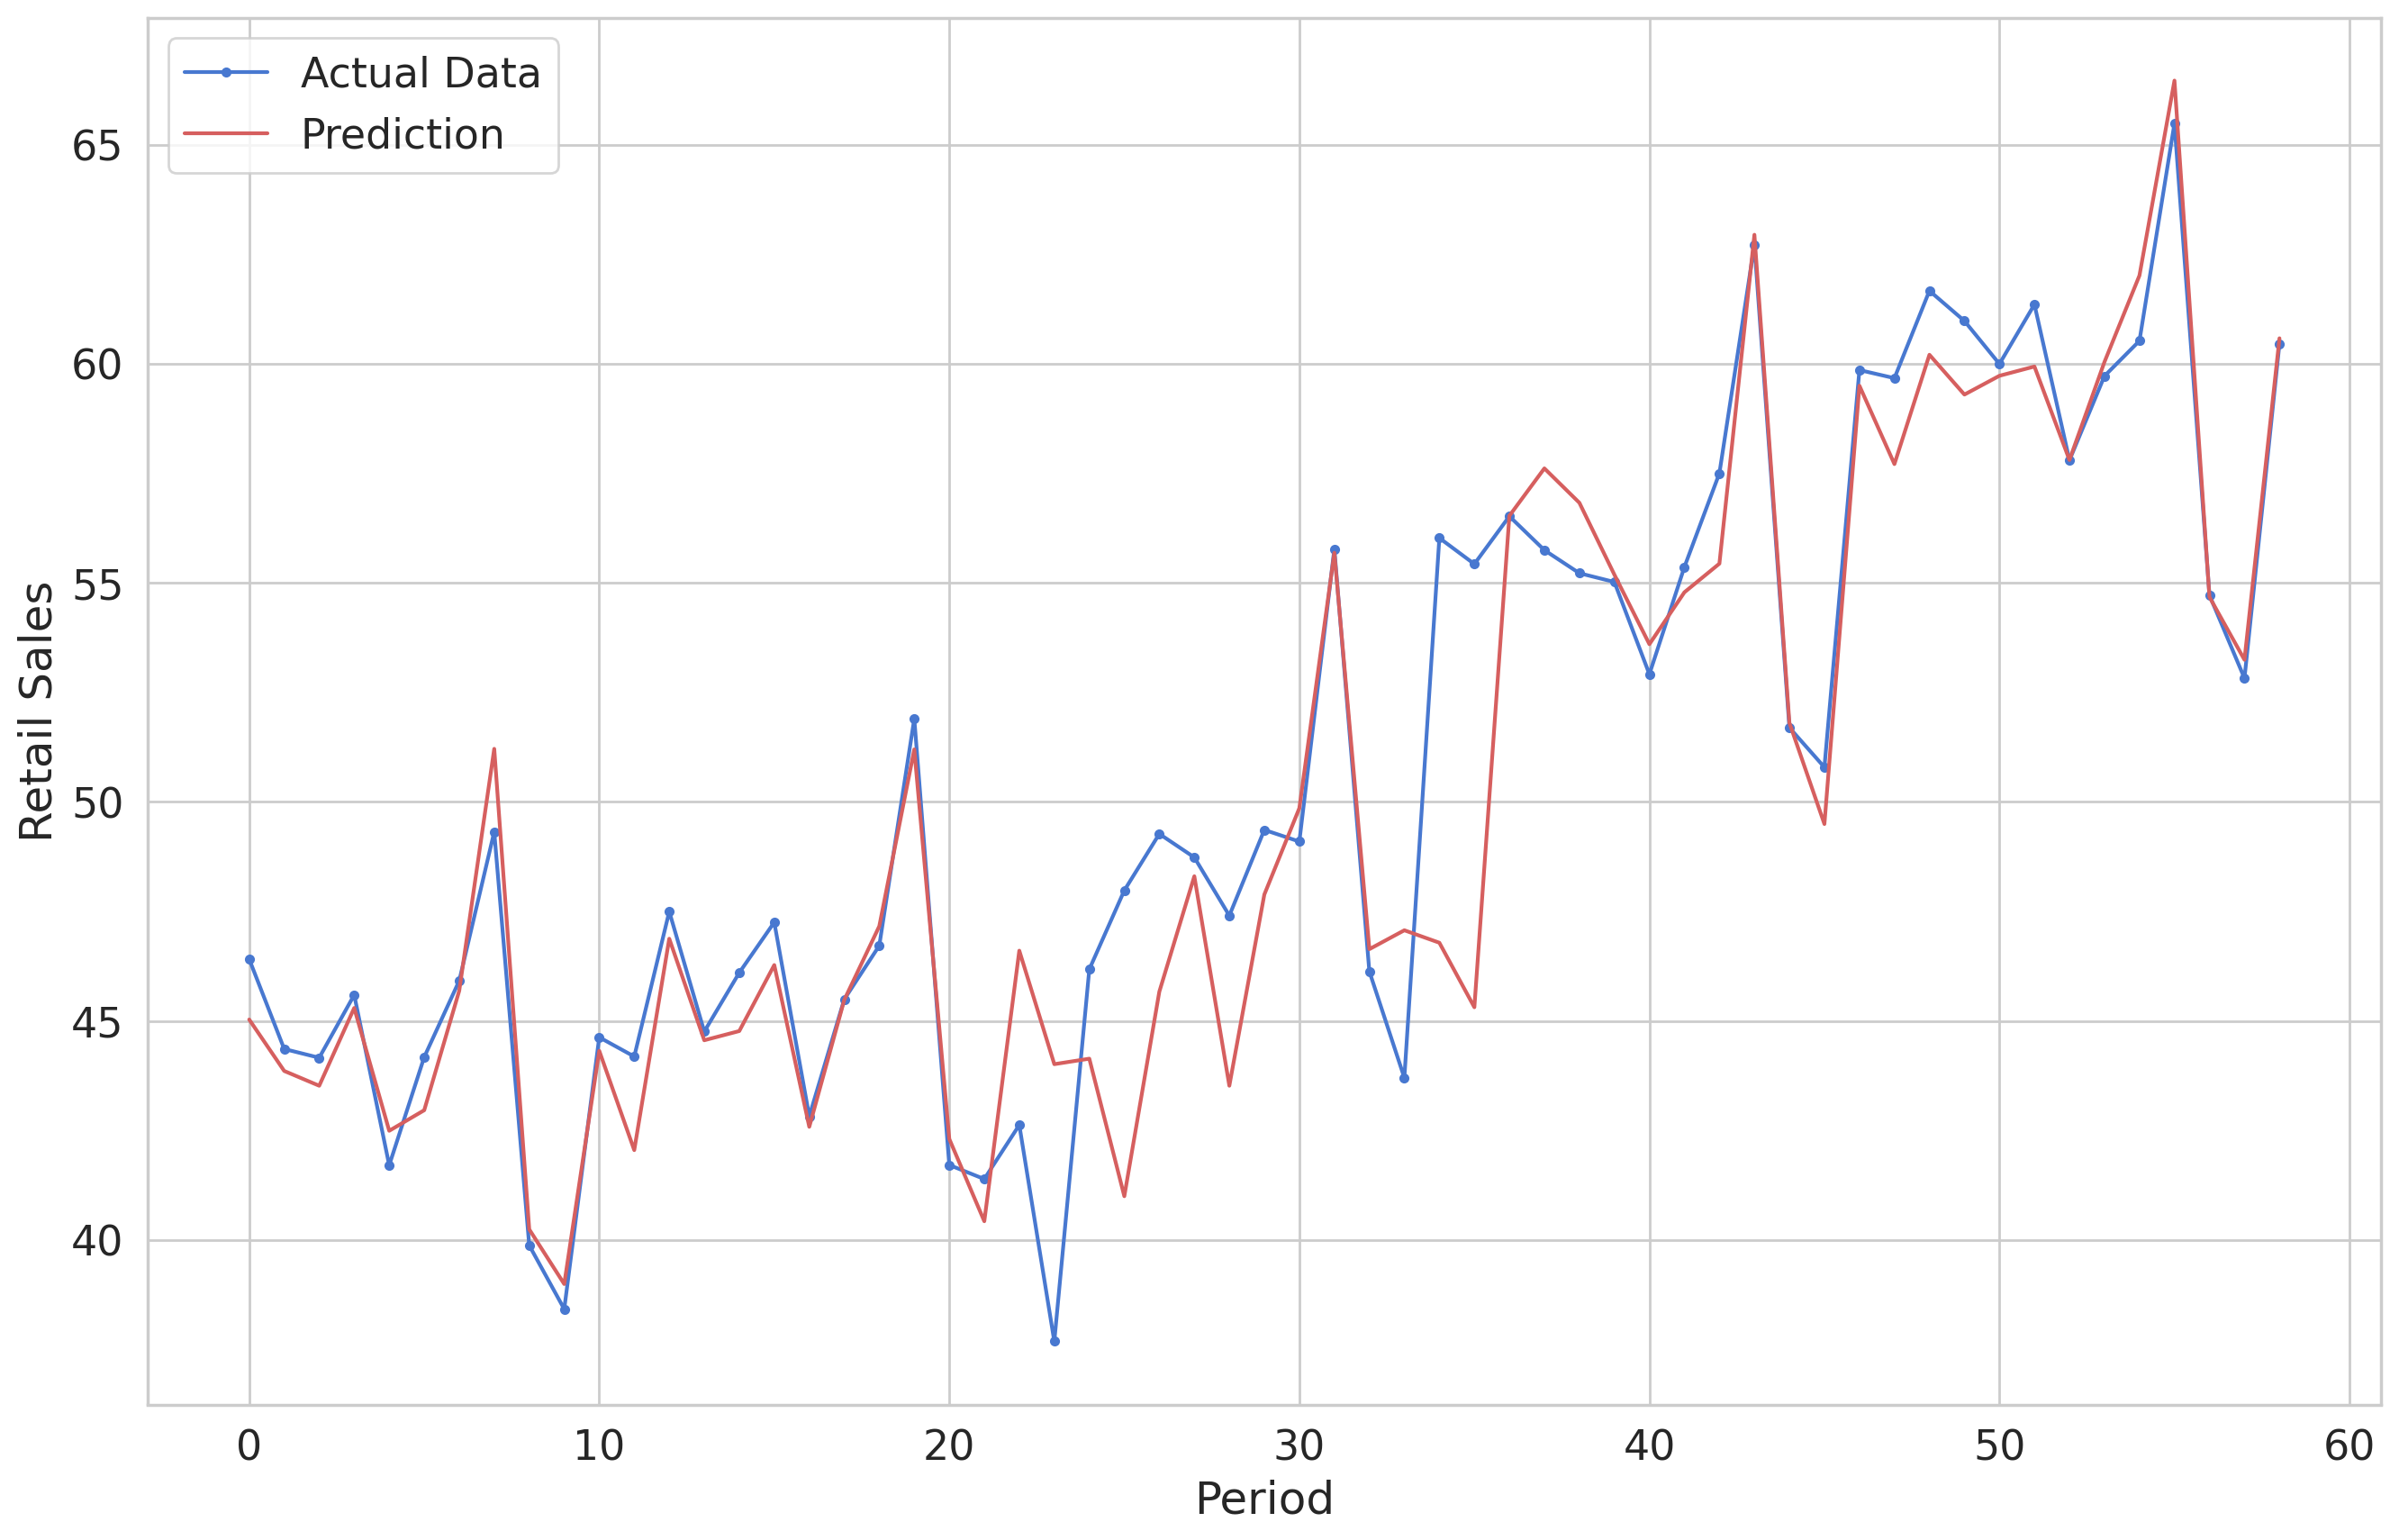

In [ ]:
# Plot real data & predicted values
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

# CNN Code
## Explanation
Changed MLP to 1D CNN model.
Conv1D layer parameters:
1. Filters (feature maps): 64
2. Kernel_size (size of local patterns): 3
3. Activation : relu

Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

Data Preprocessing

In [ ]:
xcnn_train, ycnn_train = get_timeseries(train, n_steps)
xcnn_test, ycnn_test = get_timeseries(test, n_steps)

xcnn_train = xcnn_train.reshape(xcnn_train.shape[0], xcnn_train.shape[1], n_features)
xcnn_test = xcnn_test.reshape(xcnn_test.shape[0], xcnn_test.shape[1], n_features)

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


Modeling

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))  # Add Conv1D layer with 64 filters and a kernel size of 3
model.add(Flatten())  # Reshape the output of the previous layer
model.add(Dense(1))  # Output layer
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

Training

In [ ]:
history = model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split=0.1, verbose=1, shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 26ms/step - loss: 232.9886 - val_loss: 94.9962
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 17.3388 - val_loss: 61.4424
...
Epoch 499/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5407 - val_loss: 0.4271
Epoch 500/500
8/8 [==============================] - 0s 7ms/step - loss: 0.5409 - val_loss: 0.4298


Evaluation

In [ ]:
ycnn_pred = model.predict(xcnn_test)

2/2 [==============================] - 0s 6ms/step


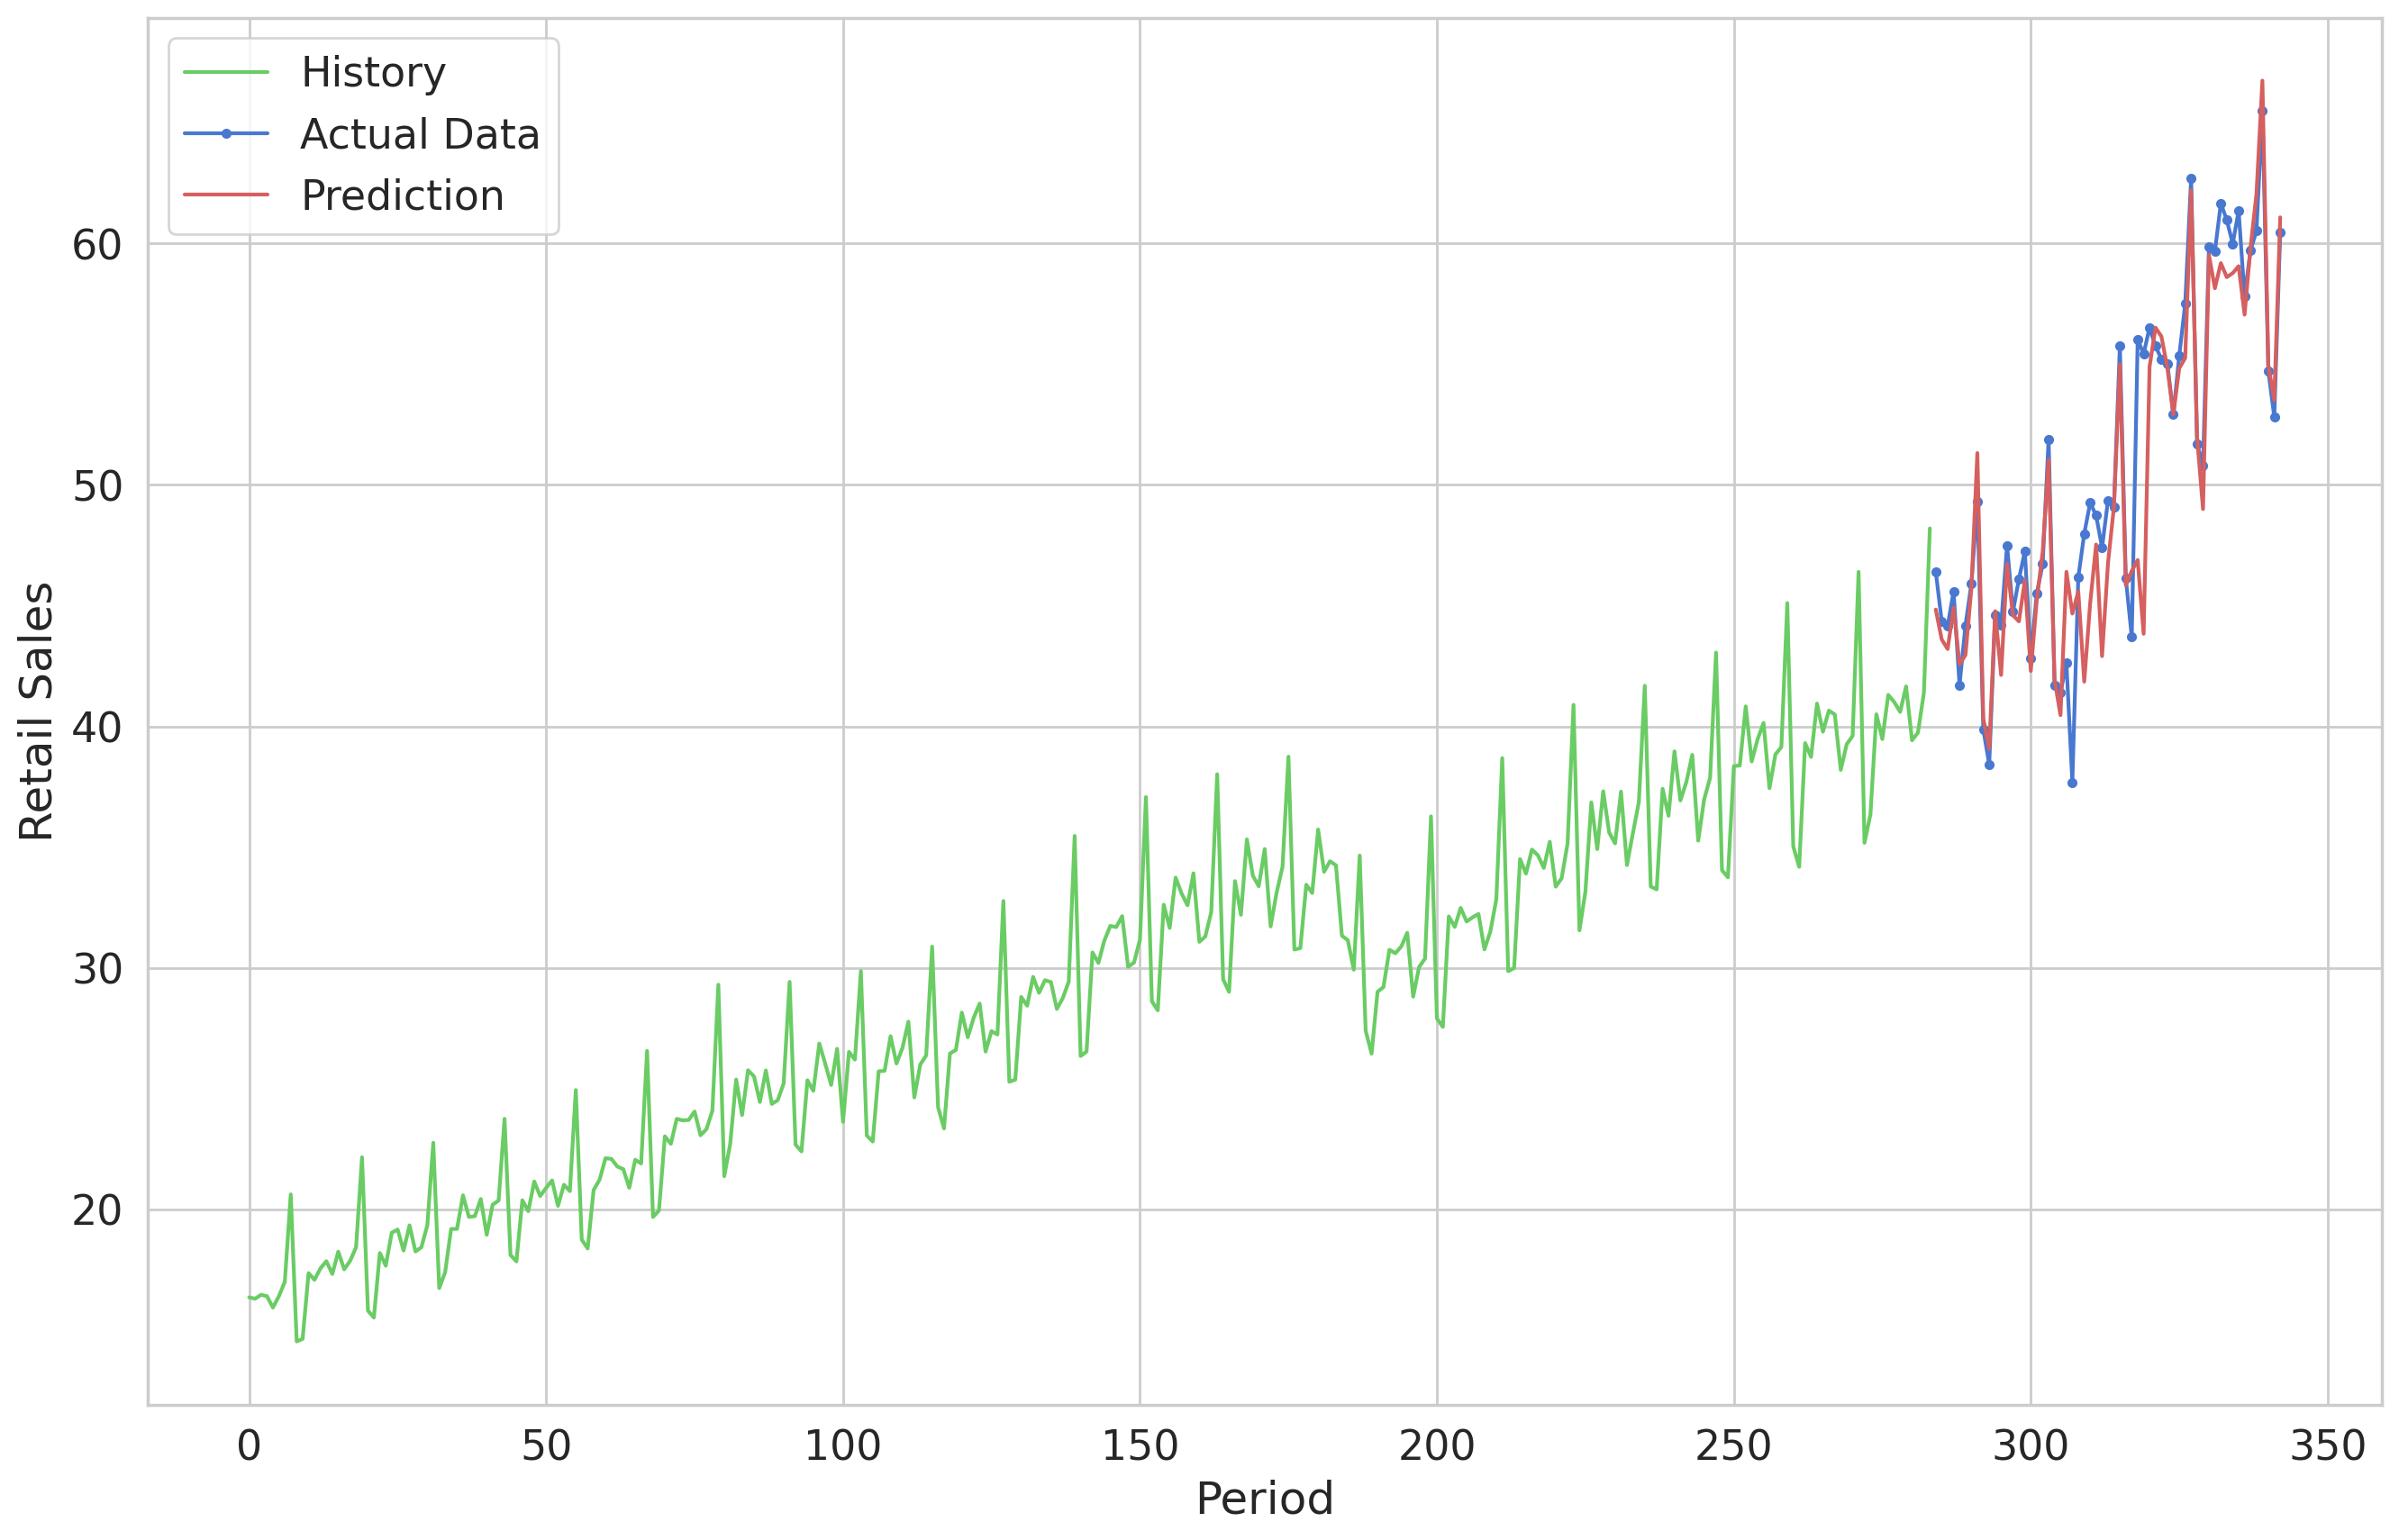

In [ ]:
plt.plot(np.arange(0, len(ycnn_train)), ycnn_train, 'g', label="History")
plt.plot(np.arange(len(ycnn_train), len(ycnn_train) + len(ycnn_test)), ycnn_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(ycnn_train), len(ycnn_train) + len(ycnn_test)), ycnn_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

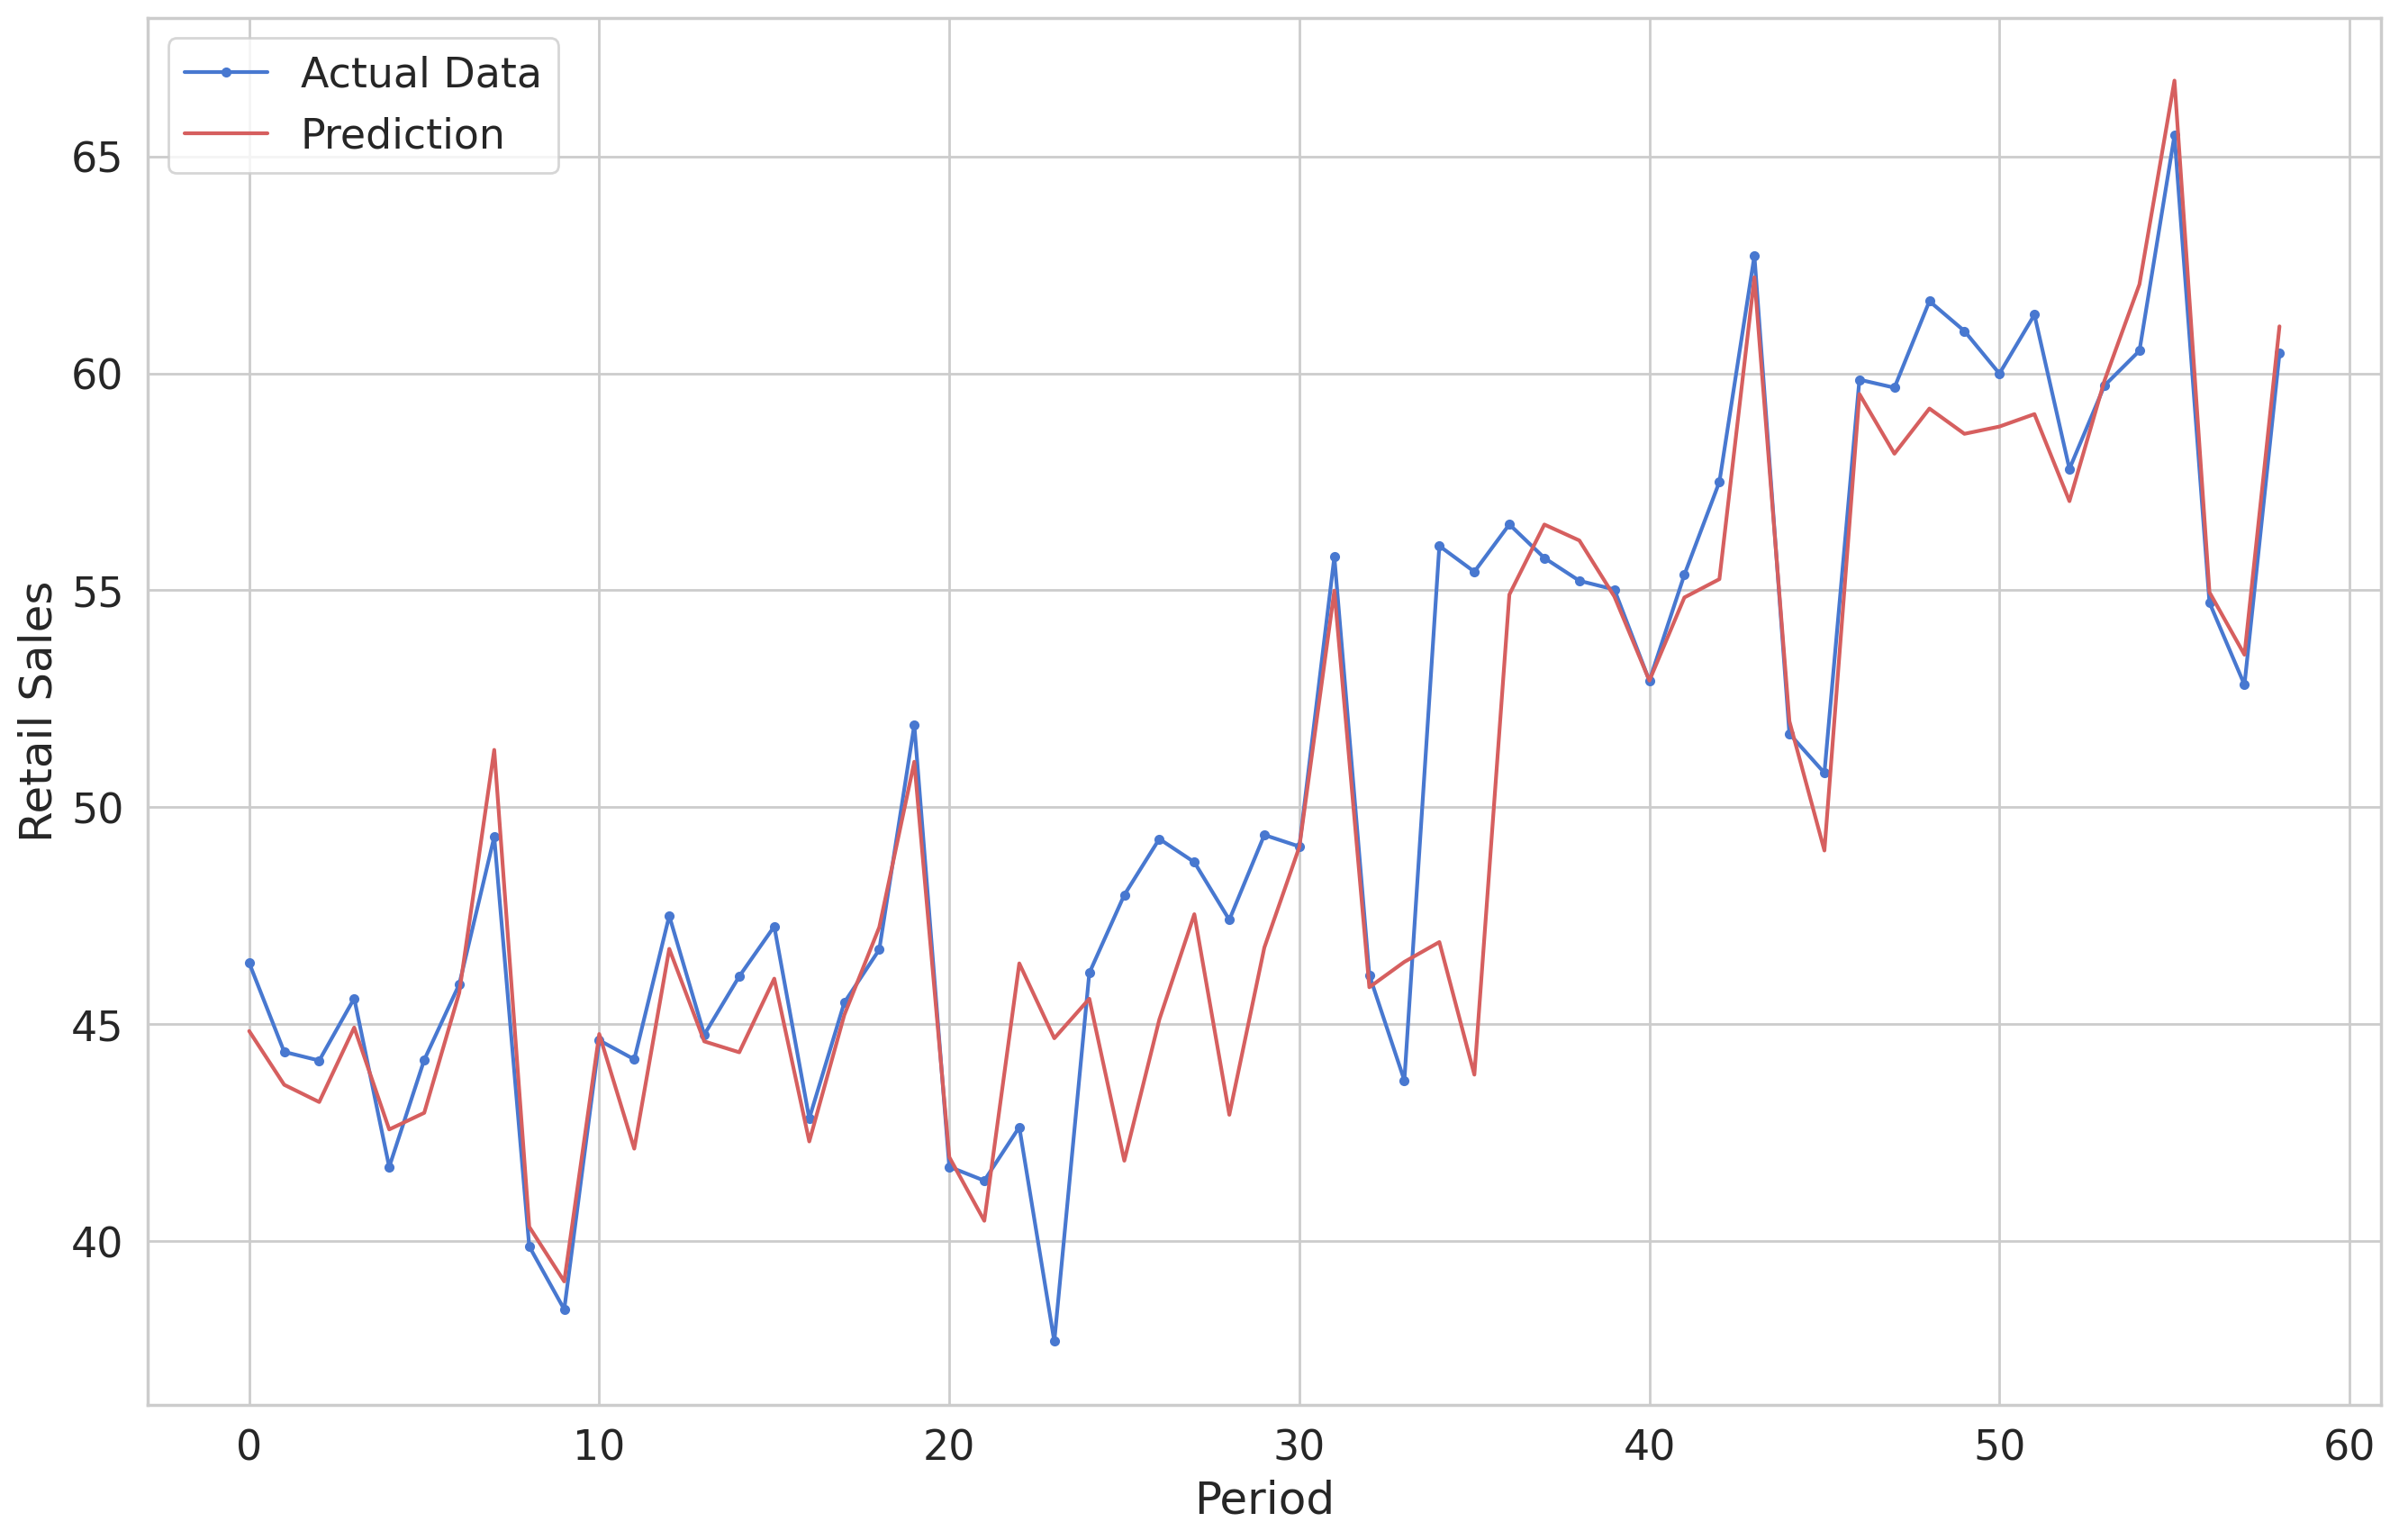

In [ ]:
plt.plot(ycnn_test, marker='.', label="Actual Data")
plt.plot(ycnn_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

# Model Comparison
MLP
Neural network that maps input data to desired output. Learns the weights of edges during training and attempts to minimize error between predictions and real output.

CNN
Attempts to detect patterns in the input data. Scans through the input data and learns to recognize patterns in the time series data.

The MLP has lower MSE and MAE when compared to the 1D CNN. However, loss during training seems to fluctuate quite heavily, meaning that the results can be quite similar.

MLP Model: Mean Squared Error = 6.524127, Mean Absolute Error = 1.496787
1D CNN Model: Mean Squared Error = 7.368008, Mean Absolute Error = 1.651321


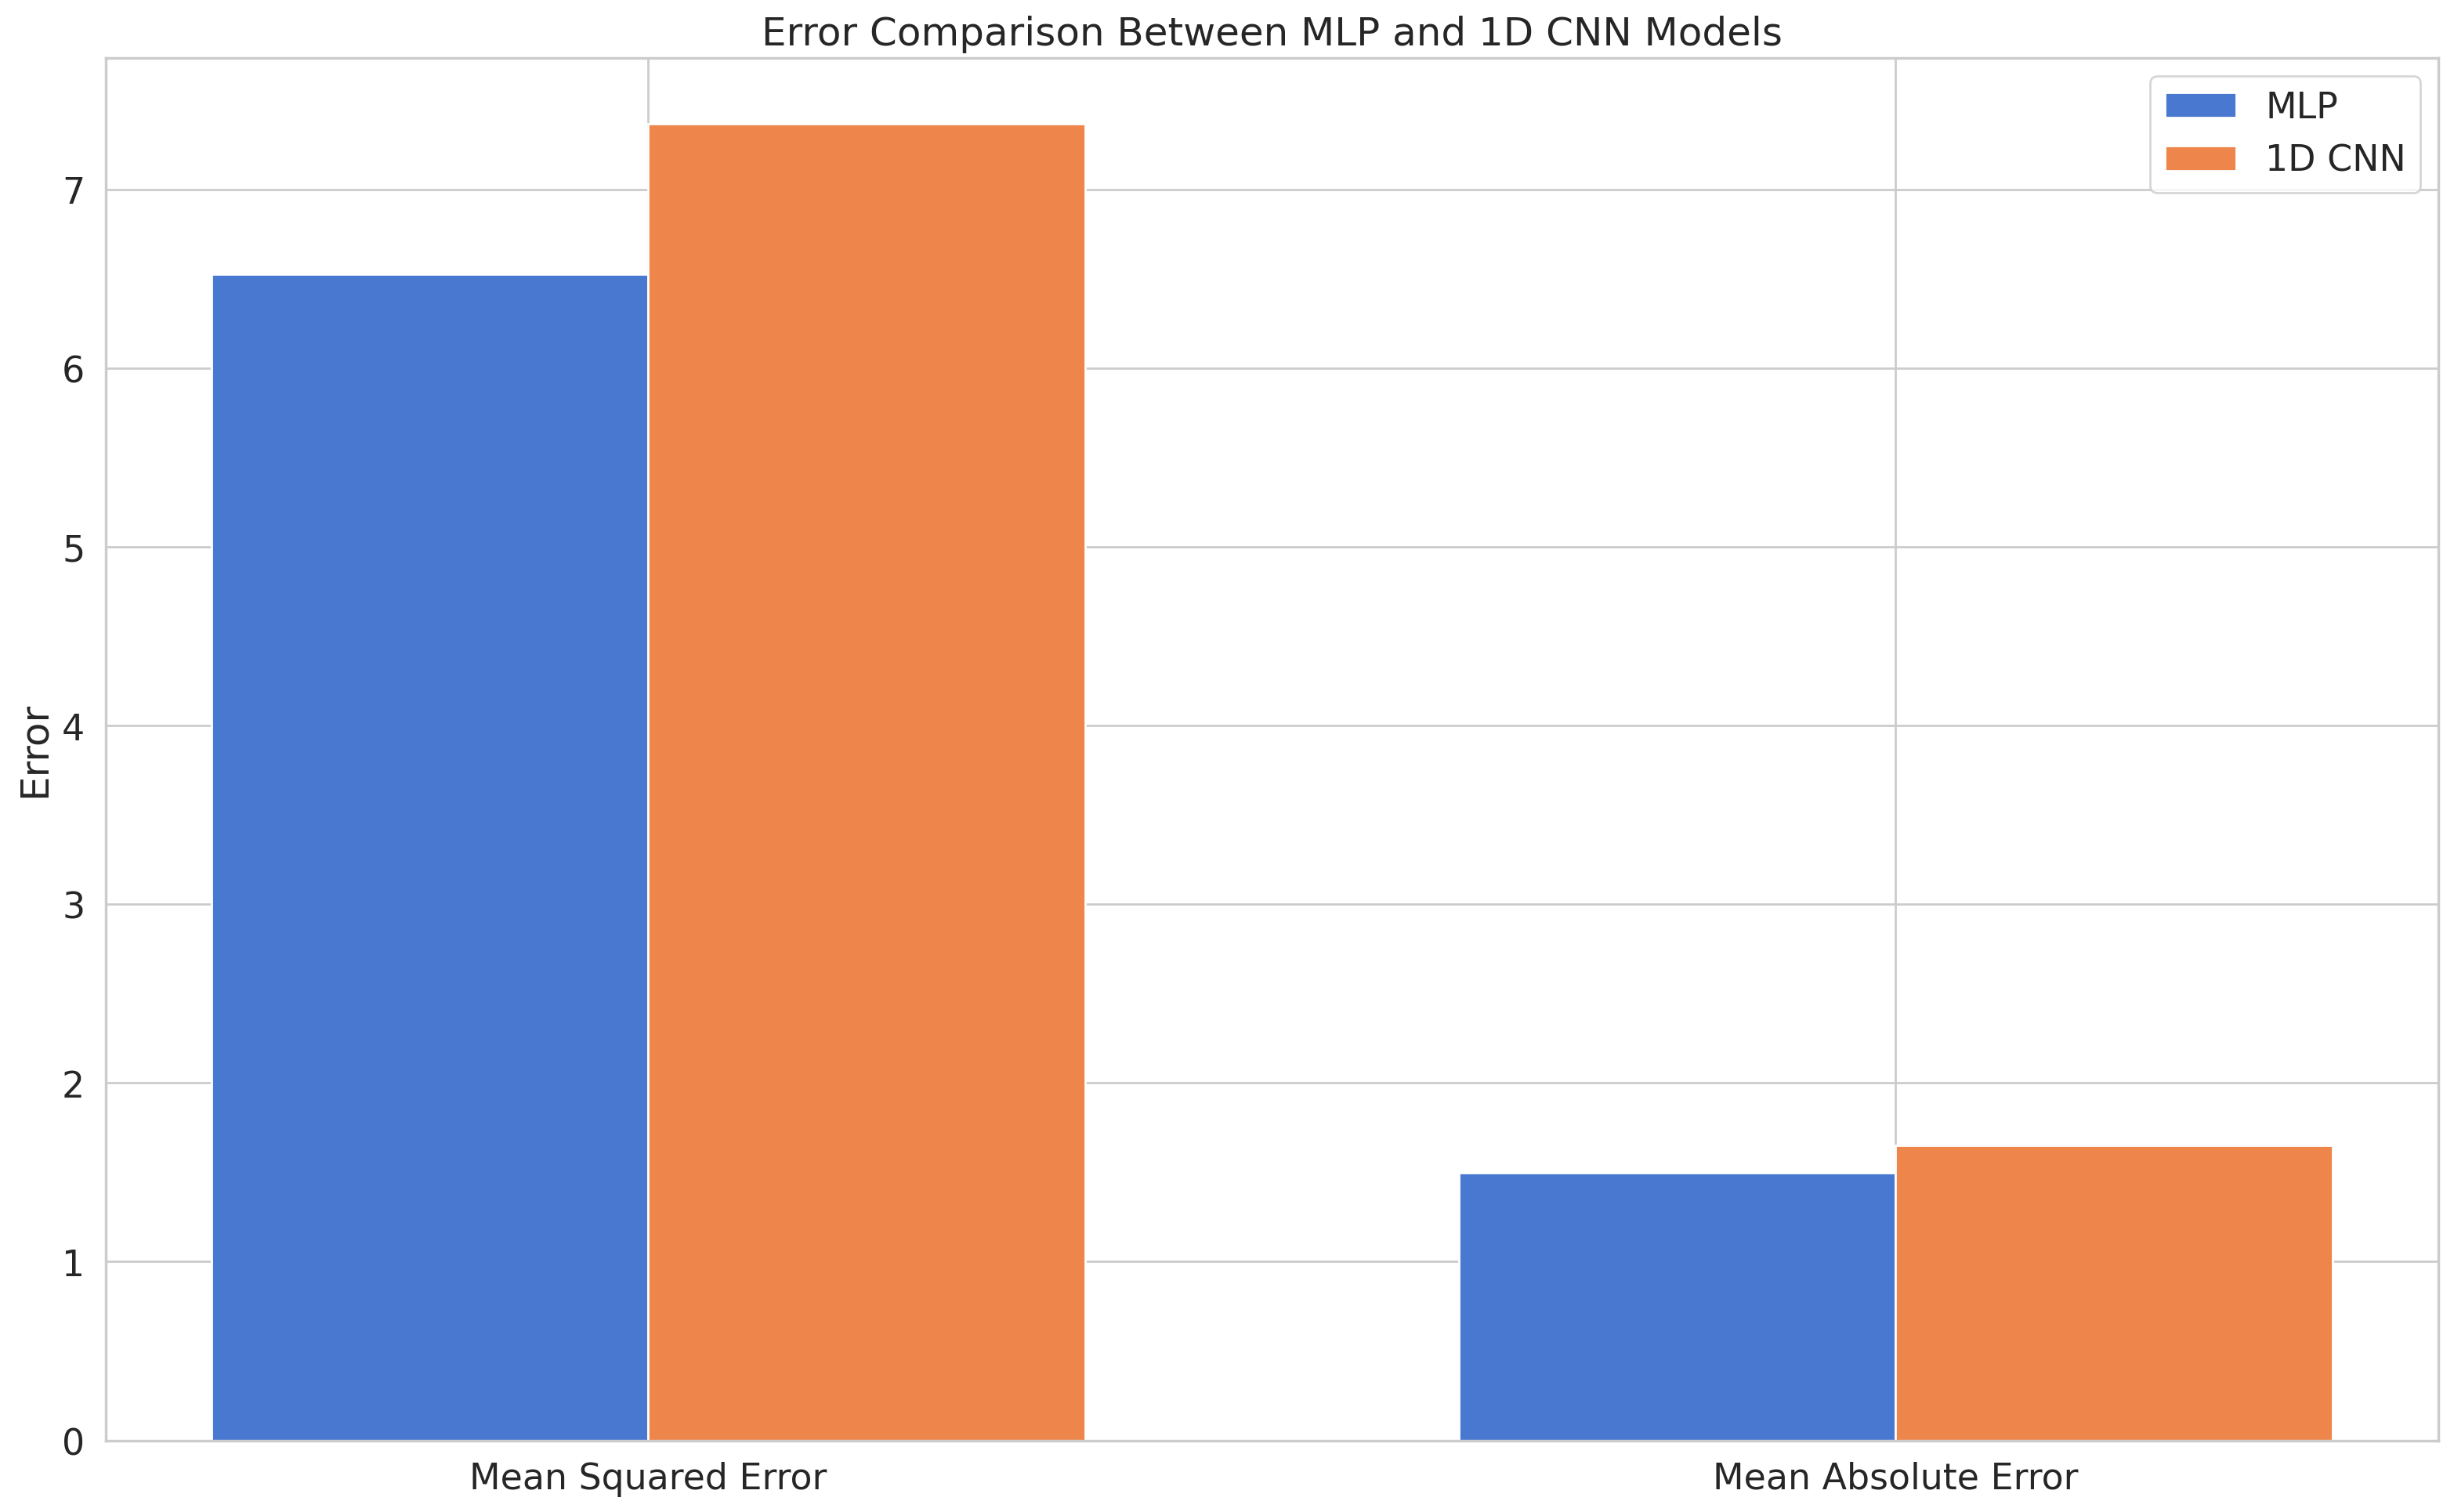

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate MSE and MAE for MLP model
mlp_mse = mean_squared_error(y_test, y_pred)
mlp_mae = mean_absolute_error(y_test, y_pred)
print(f"MLP Model: Mean Squared Error = {mlp_mse:.6f}, Mean Absolute Error = {mlp_mae:.6f}")

# Calculate MSE and MAE for 1D CNN model
cnn_mse = mean_squared_error(ycnn_test, ycnn_pred)
cnn_mae = mean_absolute_error(ycnn_test, ycnn_pred)
print(f"1D CNN Model: Mean Squared Error = {cnn_mse:.6f}, Mean Absolute Error = {cnn_mae:.6f}")

# Compare MSE and MAE visually with bar plots
metrics = ['Mean Squared Error', 'Mean Absolute Error']
mlp_metrics = [mlp_mse, mlp_mae]
cnn_metrics = [cnn_mse, cnn_mae]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width / 2, mlp_metrics, width, label='MLP')
rects2 = ax.bar(x + width / 2, cnn_metrics, width, label='1D CNN')

ax.set_ylabel('Error')
ax.set_title('Error Comparison Between MLP and 1D CNN Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()
